[ 1.   0.2 -6.  -1.4  0. ]
[[ 0.   1.   0.   0. ]
 [ 0.  -0.2 -2.   0. ]
 [ 0.   0.   0.   1. ]
 [ 0.  -0.1  6.   0. ]]


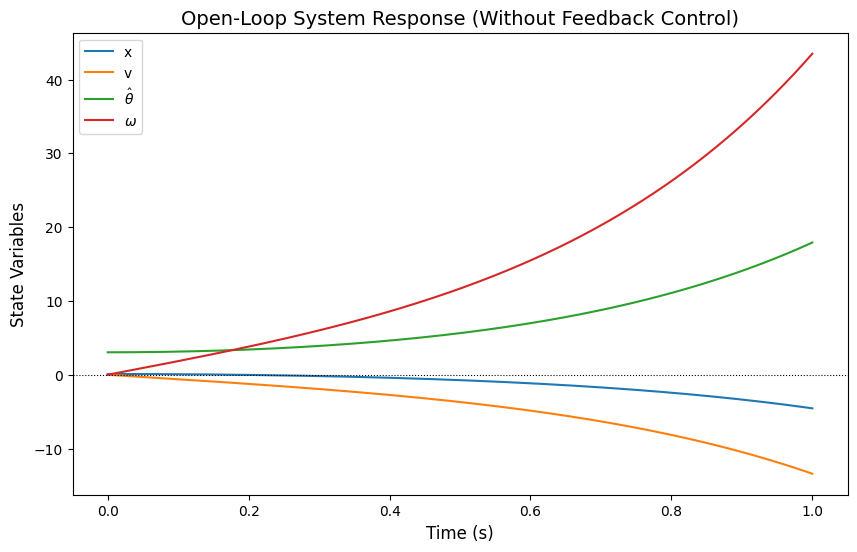

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#parameters from steve's book
m = 1.0 #mass of pend
M = 5.0 #mass of cart
L = 2.0 #length of the rod
g = -10 #rounded gravity
d = 1   # damping coefficient
b = 1 #pedulum in upwrite position, only focus on that one.

#state space matrices
A = np.array([[0,1,0,0],
 [0, -d/M,(m*g)/M,0],
  [0,0,0,1],
   [0,(-d*b)/(M*L),(-g*(m+M))/(M*L),0]])
B = np.array([[0]
             ,[1/M]
             ,[0]
             ,[b/(M*L)]])

coefficients = np.poly(A)
print(coefficients)

print(A)

def pendcart_no_feedback(x, t, A):
    dx = np.dot(A, x)  # No control input (u = 0)
    return dx

x0 = np.array([0.1, 0, np.pi - 0.1, 0])
t = np.linspace(0, 1, 4000)
x_sol = odeint(pendcart_no_feedback, x0, t, args=(A,))
plt.figure(figsize=(10, 6))
plt.plot(t, x_sol[:, 0], label="x")
plt.plot(t, x_sol[:, 1], label="v")
plt.plot(t, x_sol[:, 2], label=(r"$\hat{\theta}$"))
plt.plot(t, x_sol[:, 3], label= r"$\omega$")
plt.axhline(0, color='black', linewidth=0.8, linestyle='dotted')
plt.title("Open-Loop System Response (Without Feedback Control)", fontsize=14)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("State Variables", fontsize=12)
plt.legend()
plt.show()





In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(A)
print(A)
print(eigenvalues)
print(eigenvectors)

In [ ]:
#diagonalize A because why not
cap_lambda = np.diag(eigenvalues)
V = eigenvectors
inv_V = np.linalg.inv(V)
A_diagonalized = V @ cap_lambda @ inv_V

In [ ]:
#lets look the at block structure of A to better understand the dynamics
A11 = A[0:2, 0:2]
A22 = A[2:4, 2:4]
A12 = A[0:2, 2:4]
A21 = A[2:4, 0:2]

Feedback Stabilization:  [[-31.6227766  -51.5225036  622.59018023 207.0680827 ]]
CLosed Loop Feedback Stability Matrix: [[   0.            1.            0.            0.        ]
 [   6.32455532   10.10450072 -126.51803605  -41.41361654]
 [   0.            0.            0.            1.        ]
 [   3.16227766    5.05225036  -56.25901802  -20.70680827]]
Eigenvalues of Stability Matrix:  [-4.40355168+3.65811207j -4.40355168-3.65811207j -0.8976021 +0.73835832j
 -0.8976021 -0.73835832j]
Eigenvectors of Stability Matrix:  [[ 1.17988814e-01+0.0980155j   1.17988814e-01-0.0980155j
   5.01273718e-01+0.41234265j  5.01273718e-01-0.41234265j]
 [-8.78121514e-01+0.j         -8.78121514e-01-0.j
  -7.54400965e-01+0.j         -7.54400965e-01-0.j        ]
 [ 4.79626355e-02+0.06148654j  4.79626355e-02-0.06148654j
  -4.05417424e-02+0.04929864j -4.05417424e-02-0.04929864j]
 [-4.36130580e-01-0.09530644j -4.36130580e-01+0.09530644j
  -9.70676880e-06-0.07418489j -9.70676880e-06+0.07418489j]]


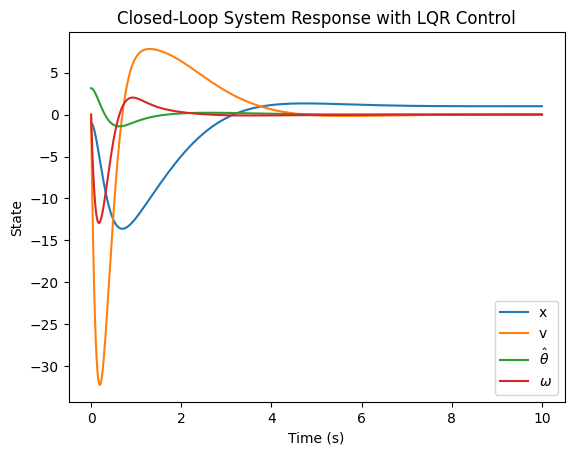

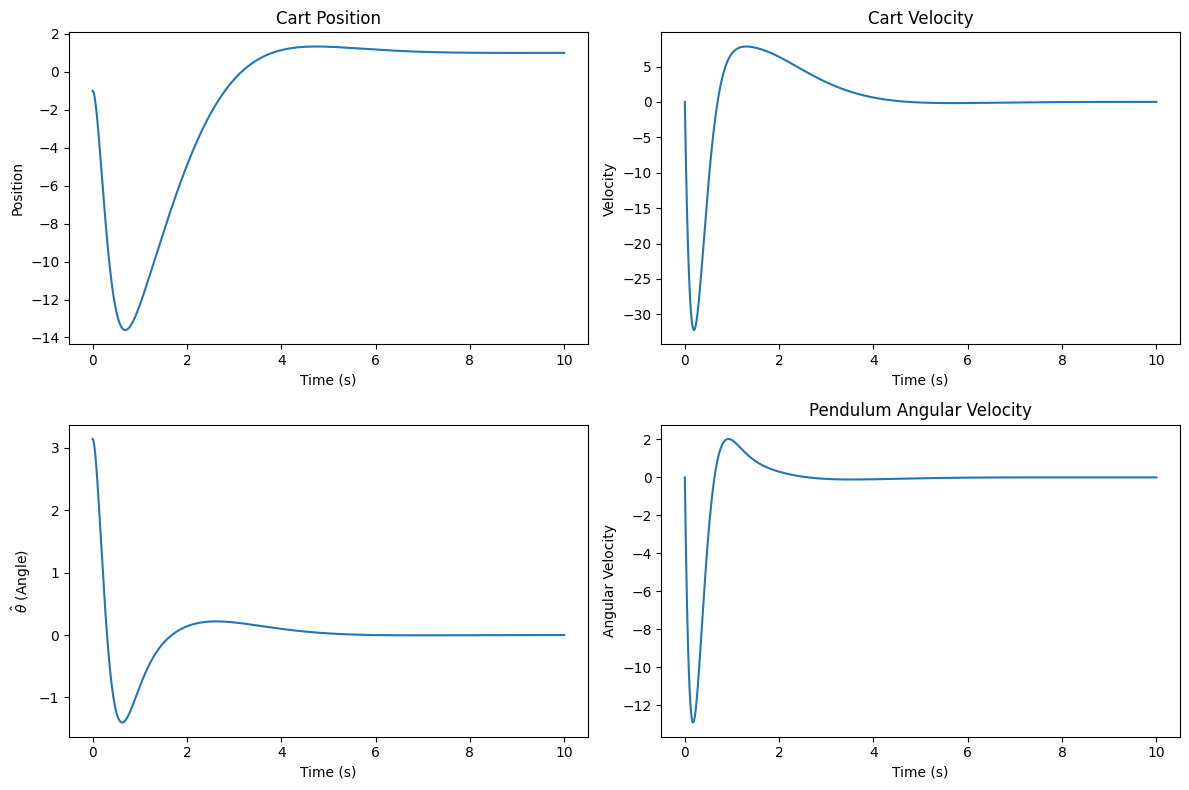

Final State:
Cart Position: 0.9954013589244305
Cart Velocity: 0.0036317354737060254
Pendulum Angle: -6.612378904381897e-05
Pendulum Angular Velocity: 0.00039325147355070874


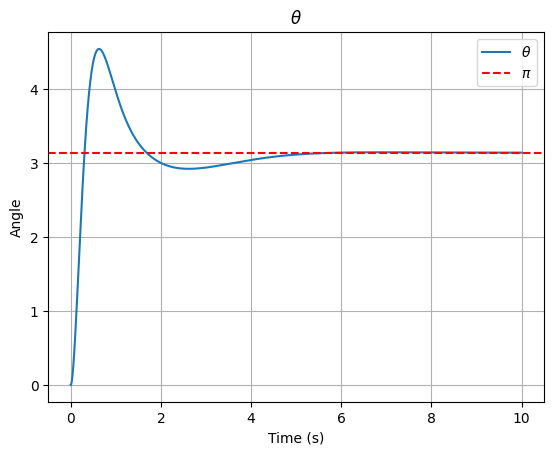

In [ ]:
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import solve_continuous_are
import matplotlib.pyplot as plt
wr = np.array([1, 0, np.pi, 0])
Q = np.diag([10,.1,1000,.10])
R = np.array([[.01]])
P = solve_continuous_are(A,B,Q,R)
K = np.linalg.inv(R) @ B.T @ P
print('Feedback Stabilization: ', K)

A_closed = A - np.dot(B,K)
eigenvalues, eigenvectors = np.linalg.eig(A_closed)
print("CLosed Loop Feedback Stability Matrix:", A_closed)
print("Eigenvalues of Stability Matrix: ", eigenvalues)
print("Eigenvectors of Stability Matrix: ",eigenvectors)

def pendcart(x,t,A,B,K,wr):
  wr = np.array([1, 0, np.pi, 0])
  error = np.array([x[0] - 1, x[1], (x[2] - wr[2] + np.pi), x[3]])
  u = -np.dot(K, error)
  dx = np.dot(A, x) + np.dot(B, u)
  return dx
x0 = np.array([-1,0,np.pi,0])
t = np.linspace(0,10,3000)
x_sol = odeint(pendcart,x0,t,args=(A,B,K,wr))
plt.plot(t,x_sol[:,0], label = "x")
plt.plot(t,x_sol[:,1], label = "v")
plt.plot(t,x_sol[:,2], label = r"$\hat{\theta}$")
plt.plot(t,x_sol[:,3], label = r"$\omega$")

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("State")
plt.title("Closed-Loop System Response with LQR Control")
plt.show()


plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(t, x_sol[:, 0], label="Cart Position (x)")
plt.title("Cart Position")
plt.xlabel("Time (s)")
plt.ylabel("Position")

plt.subplot(2, 2, 2)
plt.plot(t, x_sol[:, 1], label="Cart Velocity (v)")
plt.title("Cart Velocity")
plt.xlabel("Time (s)")
plt.ylabel("Velocity")

plt.subplot(2, 2, 3)
plt.plot(t, x_sol[:, 2], label="Pendulum Angle (r$\hat{\that}$)")
plt.title("")
plt.xlabel("Time (s)")
plt.ylabel(r"$\hat{\theta}$ (Angle)")

plt.subplot(2, 2, 4)
plt.plot(t, x_sol[:, 3], label="Pendulum Angular Velocity (r$\omega$)")
plt.title("Pendulum Angular Velocity")
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity")
plt.tight_layout()
plt.show()

print("Final State:")
print(f"Cart Position: {x_sol[-1, 0]}")
print(f"Cart Velocity: {x_sol[-1, 1]}")
print(f"Pendulum Angle: {x_sol[-1, 2]}")
print(f"Pendulum Angular Velocity: {x_sol[-1, 3]}")


theta_actual = np.pi - x_sol[:, 2]
plt.plot(t, theta_actual, label=r"$\theta$")
plt.xlabel("Time (s)")
plt.ylabel("Angle")
plt.title(r"$\theta$")
plt.axhline(y=np.pi, color='r', linestyle='--', label=r'$\pi$')
plt.legend()
plt.grid()
plt.show()



In [ ]:
#Eigenvalue placement test to confirm K
from sympy import symbols, Matrix, Eq, solve, sympify

desired_eigen = np.array([-4.4036 + 3.6581j, -4.4036 - 3.6581j, -0.8976 + 0.7384j, -0.8976 - 0.7384j])
#from the LQR method
k1,k2,k3,k4 = symbols('k1 k2 k3 k4') #lets verify that we get the feedback gain matrix K
K = Matrix([[k1,k2,k3,k4]])
A_closed = A - np.dot(B,K)
desired_char = np.poly(desired_eigen) #matching coefficents
desired_char_s = [sympify(c) for c in desired_char]
s = symbols('s')
desired_char_poly = sum(c * s**(len(desired_char) - 1 - i) for i, c in enumerate(desired_char_s))
char_eq = (s*Matrix.eye(4)-A_closed).det().expand()
solution = solve(Eq(char_eq, desired_char_poly), [k1, k2, k3, k4])
print(solution)


{k1: -31.6244546960491, k2: -51.5232947165486, k3: 622.598852692098, k4: 207.070589433097}
